# Projeto Sistemas Evolutivos

## Aluno: Yure Pablo - 11275317

## Fórmula 1 - Melhor Carro

Nesse projeto, é feito um sistema simples com três parâmetros (velocidade, eficiência e força) para um carro, o qual deve andar num circuito reto com alguns obstáculos no meio do caminho que fazem com que o carro perca velocidade. Se o carro chegar a uma velocidade zero, é o equivalente ao carro morrer o motor e ele não consegue mais continuar e perde a partida.

Usamos um sistema evolutivo para descobrir as melhores combinações de parâmetros para chegar primeiro no fim do circuito considerando limites pré-determinados. Não necessariamente o carro tunado no máximo em todos os parâmetros é o melhor, porque a força do carro faz perder velocidade, por exemplo.

In [65]:
import random

class Car:
    def __init__(self, max_speed, efficiency, strength):
        self.max_speed = max_speed
        self.efficiency = efficiency
        self.current_speed = 1
        self.distance_traveled = 0
        self.strength = strength

    def accelerate(self):
        self.current_speed = min(self.max_speed, (self.current_speed + 1 / self.strength) * self.efficiency)

    def reduce_speed_due_to_obstacle(self):
        self.current_speed = max(0, (self.current_speed - 1 / self.strength) * self.efficiency)

class Circuit:
    def __init__(self, length, obstacle_density):
        self.length = length
        self.obstacles = [random.randint(0, length) for _ in range(int(obstacle_density * length))]

    def run(self, car):
        while car.distance_traveled < self.length and car.current_speed > 0:
            for obstacle in self.obstacles:
                if car.distance_traveled == obstacle: # find a random obstacle
                    car.reduce_speed_due_to_obstacle()
                    break
            if car.current_speed > 0:
                car.distance_traveled += car.current_speed
                car.accelerate()

In [72]:
population_size = 20
length = 500
obstacle_density = 0.05
circuit = Circuit(length, obstacle_density)
population = []

MIN_SPEED = 5
MAX_SPEED = 15
MIN_EFFICIENCY = 3
MAX_EFFICIENCY = 6
MIN_STRENGTH = 1
MAX_STRENGTH = 10

for _ in range(population_size):
    population.append(Car(random.randint(MIN_SPEED, MAX_SPEED), random.uniform(MIN_EFFICIENCY, MAX_EFFICIENCY), random.randint(MIN_STRENGTH, MAX_STRENGTH)))

def fitness_function(car):
    return car.distance_traveled

def calculate_fitness_wheel(population):
    fitness_wheel = []
    current_probability = 0
    fitness_probability = []
    total_distance = sum(car.distance_traveled for car in population)

    for car in population:
        fitness_probability.append(car.distance_traveled / total_distance)

    for p in fitness_probability:
        current_probability += p
        fitness_wheel.append(current_probability)

    return fitness_wheel

def select_parents(population, num_parents):
    fitness_wheel = calculate_fitness_wheel(population)
    parents = []
    for _ in range(num_parents):
        random_value = random.random()
        for i in range(population_size):
            if random_value <= fitness_wheel[i]:
                parents.append(population[i])
                break
    return parents

def crossover(parent1, parent2): #single-point technique
    min_value = min(parent1.max_speed, parent2.max_speed)
    max_value = max(parent1.max_speed, parent2.max_speed)
    crossover_threshold_speed = random.uniform(min_value, max_value)

    min_value = min(parent1.efficiency, parent2.efficiency)
    max_value = max(parent1.efficiency, parent2.efficiency)
    crossover_threshold_efficiency = random.uniform(min_value, max_value)

    min_value = min(parent1.strength, parent2.strength)
    max_value = max(parent1.strength, parent2.strength)
    crossover_threshold_strength = random.uniform(min_value, max_value)

    crossover_car = Car(crossover_threshold_speed, crossover_threshold_efficiency, crossover_threshold_strength)

    offspring1 = parent1 if random.random() > 0.5 else crossover_car
    offspring2 = parent2 if random.random() > 0.5 else crossover_car
    return offspring1, offspring2

def mutate_strength(parent): #random value addition
    mutation_rate = 0.1
    mutation_range = 0.5
    if random.random() < mutation_rate:
        parent.strength += random.uniform(-mutation_range, mutation_range)
        parent.strength = min(parent.strength, MAX_STRENGTH)
        parent.strength = max(parent.strength, MIN_STRENGTH)
    return parent

def create_new_generation(population, parents, offspring):
    new_generation = []

    new_generation.extend(parents)
    new_generation.extend(offspring)
    new_generation.sort(key=fitness_function, reverse=True)
    return new_generation[:population_size]

Ao analisar os dados pra um circuito de tamanho 200, é possível perceber a melhor combinação dos três parâmetros.

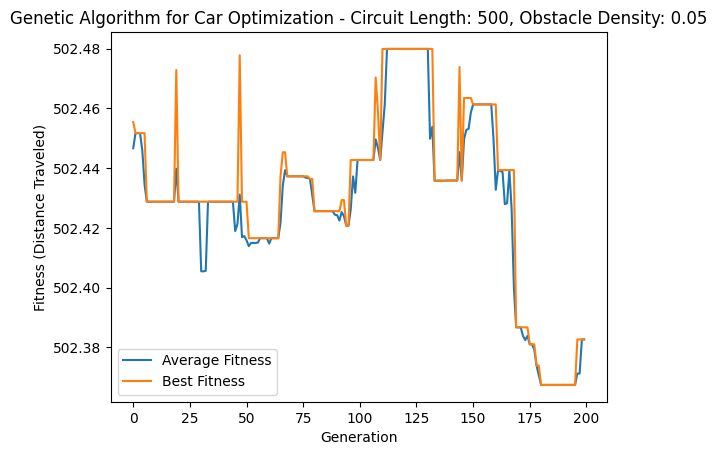

Best car after 200 generations: 
Maximum Speed: 9.379595942611672
Efficiency: 3.689650829913043
Strength: 6.423419867667337
Distance Traveled: 502.38264177547336


In [74]:
import matplotlib.pyplot as plt

best_fitness_history = []
average_fitness_history = []

max_generations = 200

for generation in range(max_generations):
    # Run simulation and calculate fitness for each car
    for car in population:
        circuit.run(car)

    population.sort(key=fitness_function, reverse=True)

    # Calculate and store average and best fitness
    average_fitness = sum(car.distance_traveled for car in population) / len(population)
    average_fitness_history.append(average_fitness)
    best_fitness_history.append(population[0].distance_traveled)

    parents = select_parents(population, 2)
    offspring1, offspring2 = crossover(parents[0], parents[1])
    offspring1 = mutate_strength(offspring1)
    offspring2 = mutate_strength(offspring2)

    new_generation = create_new_generation(population, parents, [offspring1, offspring2])
    population = new_generation

# Plot the results
plt.plot(range(max_generations), average_fitness_history, label="Average Fitness")
plt.plot(range(max_generations), best_fitness_history, label="Best Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness (Distance Traveled)")
plt.legend()
plt.title(f"Genetic Algorithm for Car Optimization - Circuit Length: {circuit.length}, Obstacle Density: {obstacle_density}")
plt.show()

best_car = max(population, key=fitness_function)
print(f"Best car after {max_generations} generations: ")
print(f"Maximum Speed: {best_car.max_speed}")
print(f"Efficiency: {best_car.efficiency}")
print(f"Strength: {best_car.strength}")
print(f"Distance Traveled: {best_car.distance_traveled}")